In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import glob


2025-03-22 12:24:56.649387: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-22 12:24:56.656720: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742646296.665006    8689 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742646296.667468    8689 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742646296.674089    8689 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
# Define paths
base_dir = '/home/kacper/Y4S2/DataScience/DataScienceSem2/archive (2)/ASL_Alphabet_Dataset'
test_dir = os.path.join(base_dir, 'asl_alphabet_test')
train_dir = os.path.join(base_dir, 'asl_alphabet_train')

In [4]:
# Image parameters (match training)
img_width, img_height = 128, 128

In [5]:
# Load the trained model
model_path = '/home/kacper/Y4S2/DataScience/DataScienceSem2/asl_sign_language_model.h5'
model = load_model(model_path)

I0000 00:00:1742646305.159244    8689 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 849 MB memory:  -> device: 0, name: NVIDIA RTX 3500 Ada Generation Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [6]:
# Get class mapping from directory structure
class_names = sorted(os.listdir(train_dir))
class_indices = {name.lower(): i for i, name in enumerate(class_names)}
class_indices_inv = {v: k for k, v in class_indices.items()}
print("Class mapping:", class_indices)

Class mapping: {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, 'del': 26, 'nothing': 27, 'space': 28}


In [7]:
# Function to extract class from filename
def get_class_from_filename(filepath):
    filename = os.path.basename(filepath)
    # Handle special cases
    if 'nothing' in filename:
        return 'nothing'
    elif 'space' in filename:
        return 'space'
    elif 'del' in filename:
        return 'del'
    else:
        # For A-Z, just take the first character
        return filename[0].upper()

In [8]:
# Process all test images
test_image_paths = glob.glob(os.path.join(test_dir, '*.jpg'))
print(f"Found {len(test_image_paths)} test images")

Found 28 test images


In [9]:
# Track results
correct = 0
total = 0
results = []

In [10]:
# Create figure for visualization
plt.figure(figsize=(15, 12))
subplot_idx = 1

<Figure size 1500x1200 with 0 Axes>

I0000 00:00:1742646319.501263    8860 service.cc:152] XLA service 0x7f2130002460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742646319.501279    8860 service.cc:160]   StreamExecutor device (0): NVIDIA RTX 3500 Ada Generation Laptop GPU, Compute Capability 8.9
2025-03-22 12:25:19.508236: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742646319.535164    8860 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1742646320.019075    8860 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Image: A_test.jpg, True: A, Predicted: a, Confidence: 0.9986, Correct: True
Image: B_test.jpg, True: B, Predicted: b, Confidence: 0.9995, Correct: True
Image: C_test.jpg, True: C, Predicted: c, Confidence: 1.0000, Correct: True
Image: D_test.jpg, True: D, Predicted: d, Confidence: 1.0000, Correct: True
Image: E_test.jpg, True: E, Predicted: e, Confidence: 0.9987, Correct: True
Image: F_test.jpg, True: F, Predicted: f, Confidence: 1.0000, Correct: True
Image: G_test.jpg, True: G, Predicted: g, Confidence: 0.9996, Correct: True
Image: H_test.jpg, True: H, Predicted: h, Confidence: 1.0000, Correct: True
Image: I_test.jpg, True: I, Predicted: i, Confidence: 1.0000, Correct: True
Image: J_test.jpg, True: J, Predicted: j, Confidence: 1.0000, Correct: True
Image: K_test.jpg, True: K, Predicted: k, Confidence: 0.9997, Correct: True
Image: L_test.jpg, True: L, Predicted: l, Confidence: 1.0000, Correct: True
Image: M_test.jpg, True: M, Predicted: m, Confidence: 0.9643, Correct: True
Image: N_tes

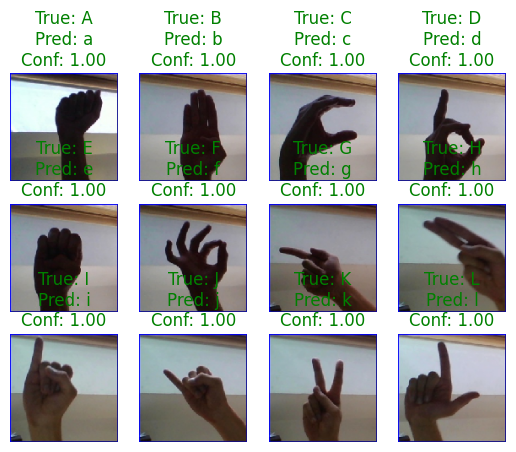

In [11]:
# Process each test image
for img_path in test_image_paths:
    # Get true class
    true_class = get_class_from_filename(img_path)
    
    # Skip if class not found in training data
    if true_class.lower() not in class_indices:
        print(f"Warning: Class '{true_class}' from {os.path.basename(img_path)} not found in training data")
        continue
        
    true_class_idx = class_indices[true_class.lower()]
    
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0
    
    # Predict
    prediction = model.predict(x, verbose=0)
    predicted_idx = np.argmax(prediction[0])
    predicted_class = class_indices_inv[predicted_idx]
    confidence = prediction[0][predicted_idx]
    
    # Check if prediction is correct
    is_correct = (predicted_idx == true_class_idx)
    if is_correct:
        correct += 1
    total += 1
    
    # Store result
    results.append({
        'image': os.path.basename(img_path),
        'true_class': true_class,
        'predicted_class': predicted_class,
        'confidence': confidence,
        'correct': is_correct
    })
    

    if subplot_idx <= 12:
        plt.subplot(3, 4, subplot_idx)
        plt.imshow(img)
        color = 'green' if is_correct else 'red'
        title = f"True: {true_class}\nPred: {predicted_class}\nConf: {confidence:.2f}"
        plt.title(title, color=color)
        plt.axis('off')
        subplot_idx += 1
    
    print(f"Image: {os.path.basename(img_path)}, True: {true_class}, Predicted: {predicted_class}, Confidence: {confidence:.4f}, Correct: {is_correct}")



In [12]:
# Calculate accuracy
if total > 0:
    accuracy = correct / total
    print(f"\nOverall test accuracy: {accuracy:.4f} ({correct}/{total})")


# Show visualization
plt.tight_layout()
plt.show()


Overall test accuracy: 1.0000 (28/28)


<Figure size 640x480 with 0 Axes>